In [2]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from os import listdir
import unicodedata

import json

from paths import *
from tools.vizu import remove_acentos
from tools.vizu import normalize_cols


from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

import yaml

# Import Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
df['state'] = df['state'].str.replace('TOTAL','BRASIL')
df.to_csv('brasil_states.csv', index=False)
dd = df.copy()

In [4]:
dd = dd.drop(['country'],1)

## MYTABLE

In [10]:
from tools.io import read_sheets
df = read_sheets('covid19_estados')

In [11]:
# ddf = pd.merge(dd , df, on=['date','state'], how='left')
# ddf['confirmed'] = ddf['totalCases']
# ddf['new_cases'] = ddf['newCases']
# ddf = ddf.drop(['city','newCases','totalCases'],1)
# df  = ddf.copy()

In [12]:
for col in ['confirmed','new_cases','deaths','new_deaths']:
    df[col] = pd.to_numeric(df[col])

In [13]:
df_states = df.sort_values(by=['date','confirmed'], ascending=False)
df_states['city'] = df_states['state']
df_states.head()

mask = (df_states['state']!='BRASIL') & (df_states['state']!='SP')
not_sp = df_states[mask].groupby(by=['date'], as_index=False).sum()

not_sp['state'] = 'BRASIL SEM SP'
not_sp['city'] = 'BRASIL SEM SP'
df_states = pd.concat([df_states,not_sp[df_states.columns]],axis=0)


# VIZZ

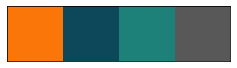

In [14]:
from tools import vizu_beta
themes = yaml.load(open('../themes/custom_colorscales.yaml', 'r'), Loader=yaml.FullLoader)

# themes =  themes['novo']
# colors =  ["#BB4140",'#2C0226' ,'#585858']

vizu_beta.show_colors(themes['novo']['colors'])

In [17]:
from tools import vizu_beta
from tools import io

themes = yaml.load(open('../themes/custom_colorscales.yaml', 'r'), Loader=yaml.FullLoader)


escala  = 'lin'
save    = True
#### CHOSE CITIES TO START SELECTED IN GRAPH
in_cities = ['BRASIL','BRASIL SEM SP','SP', 'RJ']

# mask = ((dd[var_col]>0))
# dd = dd[mask]

## confirmed or deaths
for var in ['confirmed','deaths']:
    fig = vizu_beta.brasil_vis(df_states,
                               var,
                               in_cities,
                               today='30/03/2020',
                               save=True,
                               themes=themes['novo'])
    
    
    name= "brasil_por_estado_{}.html".format(var)
    path= f"../images/brasil/{name}"
    
    plot(fig, filename=path, auto_open=False)
#     plot(fig, filename="../../sample_pages/images/covid19/brasil/brasil_por_estado_{}.html".format(var_col), auto_open=False)
    
    io.to_storage(bucket='sv-covid19',
                  bucket_folder='brasil',
                  file_name=name,
                  path_to_file=path)



Done!
Done!


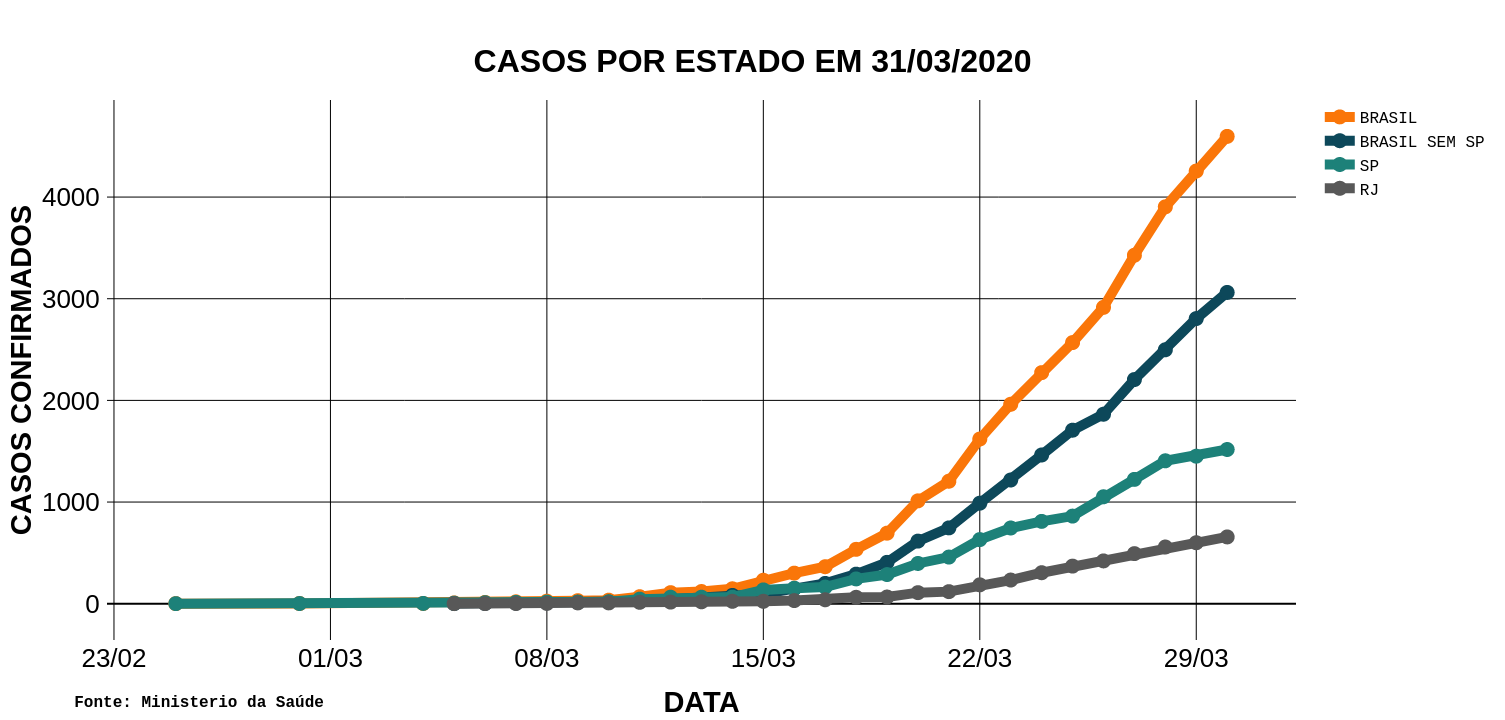

In [264]:
fig

In [15]:
x = [0, 0, 3, 6, 76]
y = ['0 a 9','10 a 19','20 a 39','40 a 59', '60+']

df = pd.DataFrame(data=np.array([x,y]).T, columns=['obitos','faixa'])
df.sort_values(by='obitos', ascending=False)

,obitos,faixa
4,76,60+
3,6,40 a 59
2,3,20 a 39
0,0,0 a 9
1,0,10 a 19


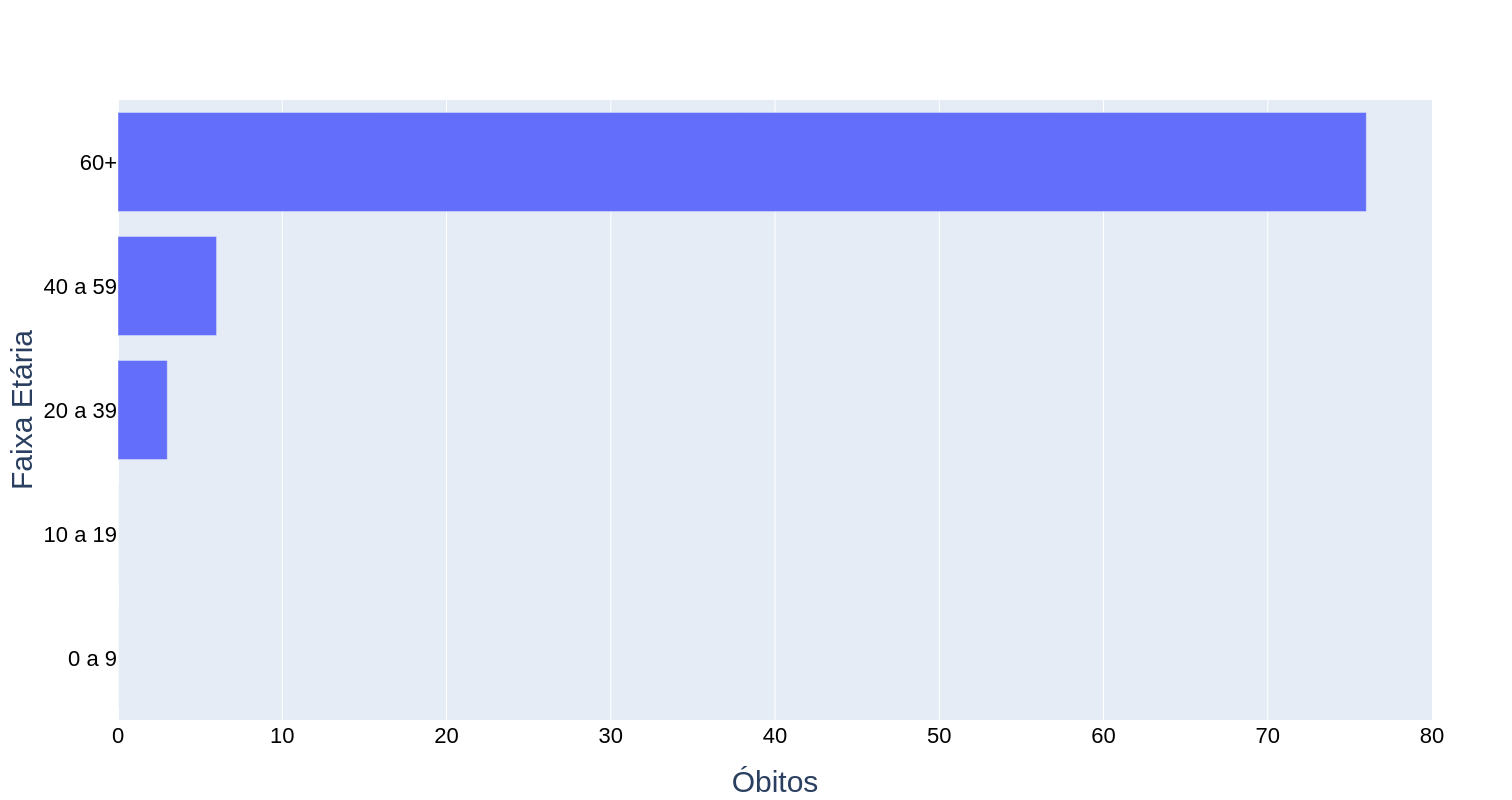

In [16]:


title  = 'Óbitos por Faixa Etária'
x_name = 'Óbitos'
y_name = 'Faixa Etária'

trace = go.Bar(
    orientation='h',
    x = df['obitos'],
    y = df['faixa']
)

data = [trace]

layout = go.Layout(
    barmode='stack',
    
    yaxis_title=y_name,
    yaxis = dict(
        tickfont=dict(
            size=22,
            color='black',
        ),
    ),
    xaxis_title=x_name,
    xaxis = dict(
        tickfont=dict(
            size=22,
            color='black',
        ),
#         font = dict(size=20)

    ),
    
    font=dict(
            size=25,
        ),

    width  = 800,
    height = 800,
)

fig = go.Figure(data=data, layout=layout)
fig